### Loading the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Red blood cells absorb light. So when haemoglobin levels are high, red blood cell count or number of red blood cells produced is high. Which means that when haemoglobin is high, as number of red blood cells are high, most of the light will be absorbed and less will be reflected. Therefore, haemoglobin level and level of reflection are inversely related. That is when haemoglobin level is high, level of reflection is low and vice versa.

### Loading the data

In [2]:
df_new = pd.read_excel("Haemoglobin_ga.xlsx")
df_new.head()

,RecNo,Serial,Hospital ID,Age,Gender,s0,s1,s2,s3,s4,...,s91,s92,s93,s94,s95,s96,s97,s98,s99,HB
0,1,3790,0,21.0,Female,1.111572,1.089060,1.070785,1.054095,1.038819,...,0.550573,0.548618,0.546023,0.544359,0.542551,0.537139,0.536306,0.536732,0.537626,10.5
1,2,3801,0,28.0,Male,1.094853,1.077337,1.063737,1.050125,1.036282,...,0.581667,0.580230,0.577882,0.576050,0.574224,0.569061,0.569617,0.571440,0.572906,13.0
2,3,3803,0,27.0,Male,0.926640,0.911944,0.899565,0.887503,0.872969,...,0.484327,0.483731,0.482222,0.481263,0.479601,0.475846,0.476002,0.476918,0.477353,13.3
3,4,3832,0,27.0,Female,0.885337,0.871370,0.855679,0.837118,0.816210,...,0.431343,0.431123,0.429914,0.428533,0.426977,0.423179,0.422927,0.423201,0.423924,10.0
4,5,3833,0,21.0,Male,0.997230,0.980019,0.967419,0.954938,0.940028,...,0.538744,0.537118,0.534293,0.531999,0.530141,0.525994,0.526979,0.528911,0.530336,10.5


In [3]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101765 entries, 0 to 101764
Columns: 106 entries, RecNo to HB
dtypes: float64(102), int64(3), object(1)
memory usage: 82.3+ MB


In [4]:
df_new.describe()
df_new['Serial'].nunique()

2455

In [5]:
df_1 = df_new.drop(['Hospital ID','RecNo'],axis = 1)

In [6]:
with_ga = df_1.dropna()

In [7]:
wo_ga = df_1.drop(['Age','Gender'],axis = 1)

In [8]:
wo_ga_x = wo_ga.drop(['HB','Serial'], axis = 1)
cols = wo_ga_x.columns.values
cols

array(['s0', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10',
       's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19',
       's20', 's21', 's22', 's23', 's24', 's25', 's26', 's27', 's28',
       's29', 's30', 's31', 's32', 's33', 's34', 's35', 's36', 's37',
       's38', 's39', 's40', 's41', 's42', 's43', 's44', 's45', 's46',
       's47', 's48', 's49', 's50', 's51', 's52', 's53', 's54', 's55',
       's56', 's57', 's58', 's59', 's60', 's61', 's62', 's63', 's64',
       's65', 's66', 's67', 's68', 's69', 's70', 's71', 's72', 's73',
       's74', 's75', 's76', 's77', 's78', 's79', 's80', 's81', 's82',
       's83', 's84', 's85', 's86', 's87', 's88', 's89', 's90', 's91',
       's92', 's93', 's94', 's95', 's96', 's97', 's98', 's99'],
      dtype=object)

### Exploratory Data Analysis

In [9]:
from ipywidgets import widgets
def scatter(col):
    plt.figure()
    sns.scatterplot(wo_ga[col] , wo_ga['HB'])
    plt.title("Scatterplot of " + str(col) + " VS Actual HB")
    plt.show()
widgets.interact(scatter , col = list(cols))

interactive(children=(Dropdown(description='col', options=('s0', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8…

<function __main__.scatter(col)>

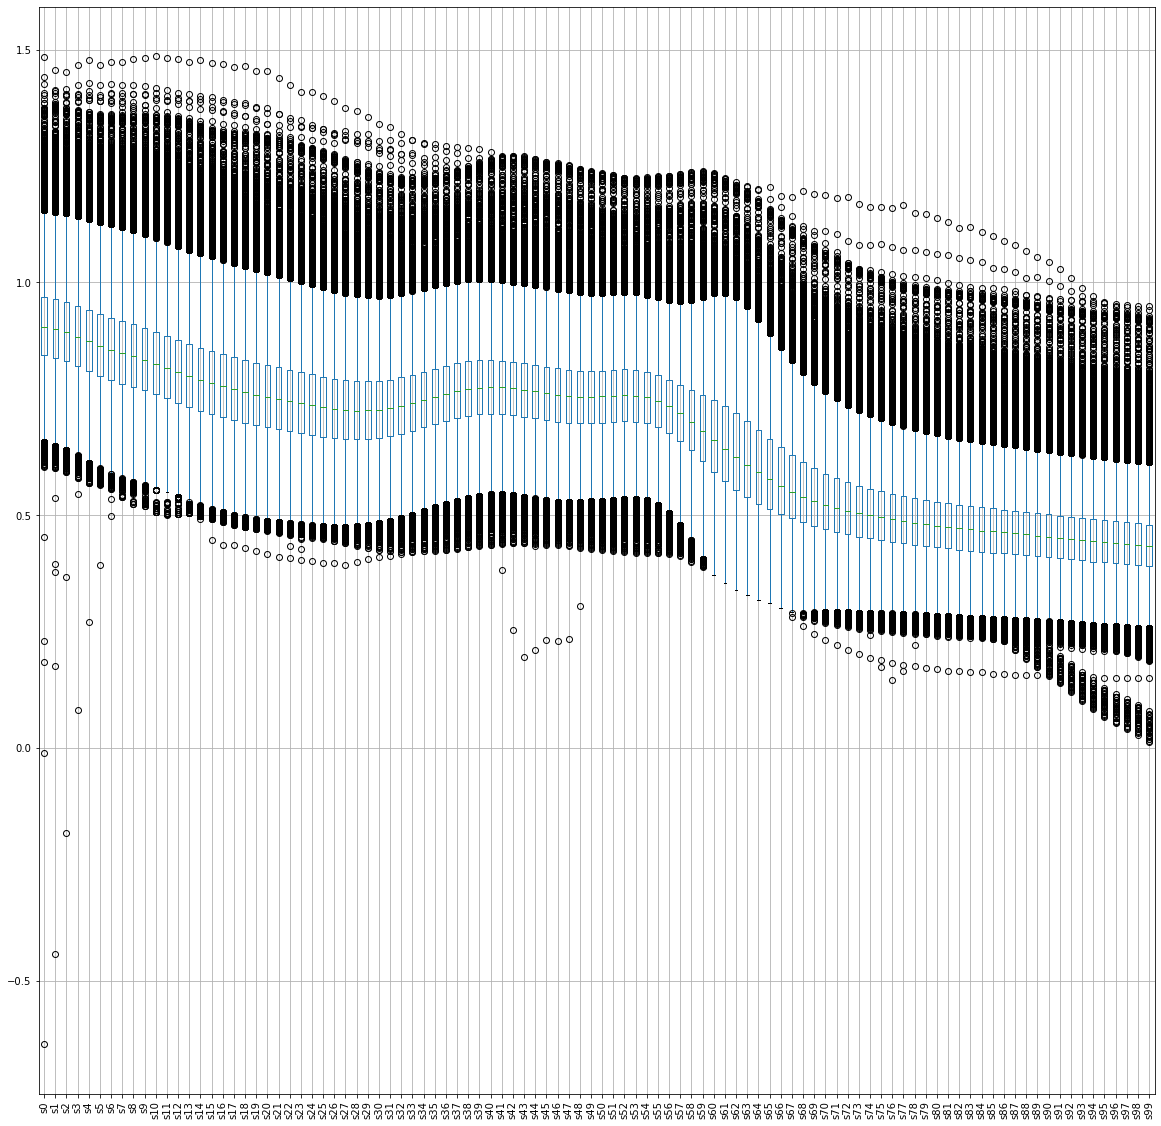

In [10]:
plt.figure(figsize = (20,20))
wo_ga_x.boxplot()
plt.xticks(rotation = 90)
plt.show()

### Pre-Model Building 

In [11]:
from sklearn import metrics

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

In [12]:
X = wo_ga.drop(['HB','Serial'],axis = 1)
y = wo_ga['HB']

#### Scaling the variables

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scale_x = sc.fit_transform(X)

#### Execution time of linear model  before pca

In [48]:
import time
start = time.time()
LinearRegression().fit(scale_x,y)
end = time.time()
print(end - start)

3.0441579818725586


### Principal Component Analysis

In [14]:
from sklearn.decomposition import PCA

pca=PCA(n_components=10)
pca_x = pca.fit_transform(scale_x)
pca_df = pd.DataFrame(pca_x , columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
pca_df['HB'] = y

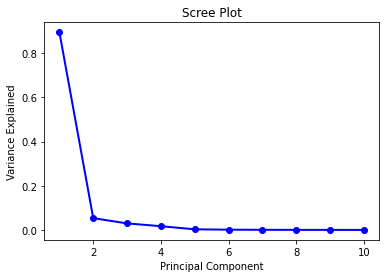

In [15]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [16]:
pca.explained_variance_ratio_

array([8.94793847e-01, 5.33063190e-02, 2.95813790e-02, 1.69395556e-02,
       2.84953664e-03, 1.17211604e-03, 5.63789507e-04, 2.76114341e-04,
       1.52979914e-04, 9.71114443e-05])

In [17]:
sum(pca.explained_variance_ratio_)

0.9997327480279207

### Linear Regression

In [18]:
x = pca_df.drop('HB',axis = 1)
Y = pca_df['HB']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,Y,test_size = 0.2 , random_state = 0)

In [19]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
cv_score_lr = cross_val_score(lr,x,Y, cv=5, scoring = 'r2')
max(cv_score_lr)

0.13258111042388443

#### Execution time by linear model on the PCA data

In [50]:
import time
start = time.time()
lr.fit(X_train,y_train)
end = time.time()
print(end - start)

0.10607433319091797


#### Model Accuracy

In [52]:
score_lr = lr.score(X_test,y_test)
print("R square is "  + str(score_lr))
radj_lr1 = 1 - (1-lr.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted R-square is ' +  str(radj_lr1))

R square is 0.1420938701857576
Adjusted R-square is 0.14167212889689007


#### Model Summary

In [21]:
print('Linear Regression Intercept:' + str(lr.intercept_))
print('Linear Regresssion Coefficient:' + str(lr.coef_))

Linear Regression Intercept:11.513340251684076
Linear Regresssion Coefficient:[ 0.02270351  0.18364551 -0.14241392 -0.28298097 -0.16258919  0.11720671
  0.10013541  0.75884054  0.14675408 -0.96938036]


### Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
cv_score_rf = cross_val_score(rf,X_train,y_train, cv=5, scoring = 'r2')
max(cv_score_rf)

0.9507597347172214

#### Model Accuracy

In [24]:
rf.fit(X_train,y_train)
score_rf = rf.score(X_test,y_test)
print("R square is "  + str(score_rf))
radj_rf1 = 1 - (1-rf.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted R-square is ' +  str(radj_rf1))

R square is 0.956971504629653
Adjusted R-square is 0.9569503520903893


### Support Vector Machine

In [25]:
#SVM
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
score_svr = regressor.score(X_test,y_test)
print(score_svr)

0.22649981163353783


### XGBoost

In [43]:
#XGBoost
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=500, objective='reg:squarederror', booster='gbtree')
RegModel.fit(X_train,y_train)
score_xgb = RegModel.score(X_test,y_test)

In [44]:
score_xgb

0.5151674249218674

## Model with age as a continuous variable and gender as a binary variable

In [26]:
with_ga.describe()
ga = pd.get_dummies(with_ga)

In [27]:
ga.head()

,Serial,Age,s0,s1,s2,s3,s4,s5,s6,s7,...,s93,s94,s95,s96,s97,s98,s99,HB,Gender_Female,Gender_Male
0,3790,21.0,1.111572,1.089060,1.070785,1.054095,1.038819,1.022716,1.010897,0.997921,...,0.546023,0.544359,0.542551,0.537139,0.536306,0.536732,0.537626,10.5,1,0
1,3801,28.0,1.094853,1.077337,1.063737,1.050125,1.036282,1.021623,1.011224,0.999654,...,0.577882,0.576050,0.574224,0.569061,0.569617,0.571440,0.572906,13.0,0,1
2,3803,27.0,0.926640,0.911944,0.899565,0.887503,0.872969,0.857463,0.846463,0.835331,...,0.482222,0.481263,0.479601,0.475846,0.476002,0.476918,0.477353,13.3,0,1
3,3832,27.0,0.885337,0.871370,0.855679,0.837118,0.816210,0.794550,0.778399,0.763338,...,0.429914,0.428533,0.426977,0.423179,0.422927,0.423201,0.423924,10.0,1,0
4,3833,21.0,0.997230,0.980019,0.967419,0.954938,0.940028,0.922851,0.910277,0.897755,...,0.534293,0.531999,0.530141,0.525994,0.526979,0.528911,0.530336,10.5,0,1


In [28]:
#Female == 1
ga1 = ga.drop('Gender_Male' , axis = 1)
ga1.head()
ga1.rename({'Gender_Female':"Gender"} , axis = 1)

,Serial,Age,s0,s1,s2,s3,s4,s5,s6,s7,...,s92,s93,s94,s95,s96,s97,s98,s99,HB,Gender
0,3790,21.0,1.111572,1.089060,1.070785,1.054095,1.038819,1.022716,1.010897,0.997921,...,0.548618,0.546023,0.544359,0.542551,0.537139,0.536306,0.536732,0.537626,10.5,1
1,3801,28.0,1.094853,1.077337,1.063737,1.050125,1.036282,1.021623,1.011224,0.999654,...,0.580230,0.577882,0.576050,0.574224,0.569061,0.569617,0.571440,0.572906,13.0,0
2,3803,27.0,0.926640,0.911944,0.899565,0.887503,0.872969,0.857463,0.846463,0.835331,...,0.483731,0.482222,0.481263,0.479601,0.475846,0.476002,0.476918,0.477353,13.3,0
3,3832,27.0,0.885337,0.871370,0.855679,0.837118,0.816210,0.794550,0.778399,0.763338,...,0.431123,0.429914,0.428533,0.426977,0.423179,0.422927,0.423201,0.423924,10.0,1
4,3833,21.0,0.997230,0.980019,0.967419,0.954938,0.940028,0.922851,0.910277,0.897755,...,0.537118,0.534293,0.531999,0.530141,0.525994,0.526979,0.528911,0.530336,10.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,1272,60.0,0.944481,0.936851,0.933647,0.924879,0.914422,0.905567,0.898337,0.891043,...,0.505947,0.502221,0.499196,0.495792,0.492888,0.489912,0.487988,0.486480,12.0,1
101761,1272,60.0,0.953750,0.943192,0.938576,0.930557,0.920534,0.911944,0.905013,0.897771,...,0.508857,0.505084,0.503612,0.501019,0.498227,0.494874,0.491237,0.489598,12.0,1
101762,1272,60.0,0.950452,0.941978,0.936802,0.927402,0.917317,0.908880,0.901772,0.894222,...,0.506535,0.502254,0.500789,0.498837,0.496110,0.491385,0.488431,0.487415,12.0,1
101763,1272,60.0,0.955741,0.946137,0.941490,0.932453,0.921778,0.912469,0.905354,0.898180,...,0.511350,0.507332,0.504680,0.502769,0.500643,0.497776,0.492578,0.489961,12.0,1


<AxesSubplot:>

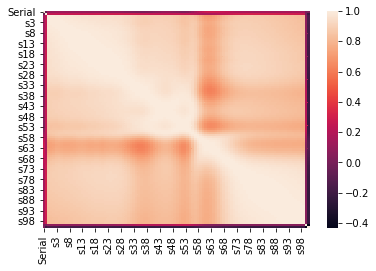

In [47]:
corr_df = ga1.corr()
sns.heatmap(corr_df)

In [32]:
X_ga = ga1.drop(['Serial','HB'] , axis = 1)
y_ga = ga1['HB']

In [33]:
scale_ga = sc.fit_transform(X_ga)
pca_ga = pca.fit_transform(scale_ga)

In [34]:
pca_df_ga = pd.DataFrame(pca_ga , columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
pca_df_ga['HB'] = y_ga

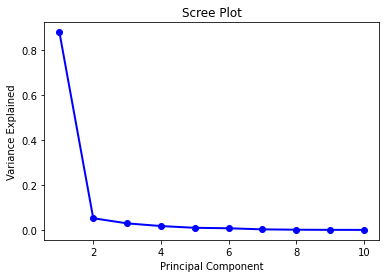

In [35]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [36]:
sum(pca.explained_variance_ratio_)

0.9994987429560384

In [37]:
pca_df_ga1 = pca_df_ga.dropna()
x_ga = pca_df_ga1.drop('HB',axis = 1)
Y_ga = pca_df_ga1['HB']

#### Linear Regression

In [38]:
X_tra,X_tes,y_tra,y_tes = train_test_split(x_ga,Y_ga,test_size = 0.2 , random_state = 0)
lr.fit(X_tra,y_tra)
score_lr_ga = lr.score(X_tes,y_tes)
score_lr_ga
radj_lr = 1 - (1-lr.score(X_tes, y_tes))*(len(y_tes)-1)/(len(y_tes)-X_tes.shape[1]-1)
print('Adjusted R-square is ' +  str(radj_lr))

Adjusted R-square is 0.04169528430298597


In [39]:
cv_score_lr = cross_val_score(lr,x_ga,Y_ga, cv=5, scoring = 'r2')
max(cv_score_lr)

-0.005813904563486405

#### Random Forest

In [75]:
rf.fit(X_tra,y_tra)
score_rf_ga = rf.score(X_tes,y_tes)
score_rf_ga
radj_rf = 1 - (1-rf.score(X_tes, y_tes))*(len(y_tes)-1)/(len(y_tes)-X_tes.shape[1]-1)
print('Adjusted R-square is ' +  str(radj_rf))

Adjusted R-square is 0.8293058624296733


In [40]:
cv_score_rf = cross_val_score(rf,X_tra,y_tra, cv=5, scoring = 'r2')
max(cv_score_rf)

0.8158317327784781

#### Support Vector Machine

In [41]:
regressor.fit(X_tra, y_tra)
score_svr_ga = regressor.score(X_tes,y_tes)
print(score_svr_ga)

0.11447201784885253


#### XGBoost

In [45]:
RegModel.fit(X_tra,y_tra)
score_xgb_ga = RegModel.score(X_tes,y_tes)

In [46]:
score_xgb_ga

0.3908771786598876